<a href="https://colab.research.google.com/github/VinayakChaurasia05/Spam_Mail/blob/main/PYTHON_PROJECT_SED2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM EMAIL DETECTION

In [ ]:
## IMPORT SOME IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer # Changed Tfidvectorizer to TfidfVectorizer
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mail_data.csv")

In [ ]:
print(df.head()) ## To print some datapoints of dataframe

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


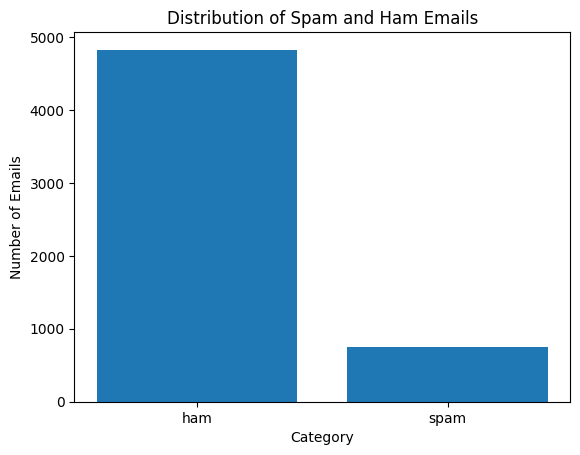

In [ ]:
# Count the occurrences of each category
category_counts = data['Category'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Number of Emails')
plt.show()

In [ ]:
data = df.where((pd.notnull(df)), '')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.loc[data['Category'] == 'spam' , 'category',] = 0
data.loc[data['Category'] == 'ham' , 'category',] = 1

In [ ]:
X = data['Message']
Y = data['category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: category, Length: 5572, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase= True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features =feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [ ]:
prediction_for_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_for_training_data)

In [ ]:
print('Accuracy on training data :',accuracy_on_training_data)

Accuracy on training data : 0.9676912721561588


In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9668161434977578


In [ ]:
Input = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]
input_data_features = feature_extraction.transform(Input)
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
